<a href="https://colab.research.google.com/github/FaizAlam/ML/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
from pandas import read_csv
import sklearn
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
Laptop not available, so commiting to maintain the green garden, hehe. Same for day 2. Same for day 3. Same for day 5. same for nth day. Same for (n+1)th day. Same for (n+2)th day. Same for (n+3)th day.

In [3]:
url = 'https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv'

In [16]:
df = read_csv(url)

In [5]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [17]:
df.drop('Offers',inplace=True,axis=1)

In [18]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Brick,Neighborhood
0,1,114300,1790,2,2,No,East
1,2,114200,2030,4,2,No,East
2,3,114800,1740,3,2,No,East
3,4,94700,1980,3,2,No,East
4,5,119800,2130,3,3,No,East


In [23]:
df.drop('Home', inplace=True,axis=1)

In [24]:
print(df.groupby('Neighborhood').size())

Neighborhood
East     45
North    44
West     39
dtype: int64


# Visualize

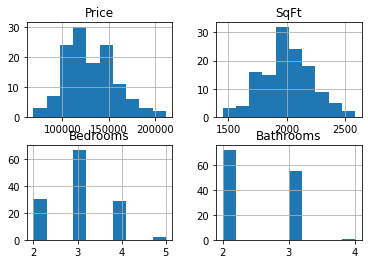

In [25]:
df.hist()
pyplot.show()

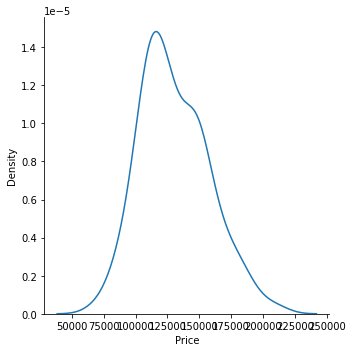

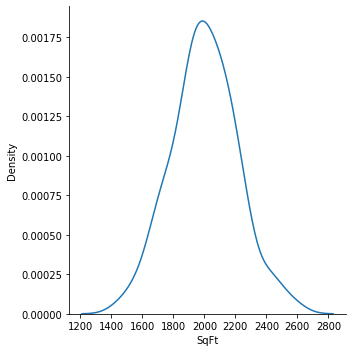

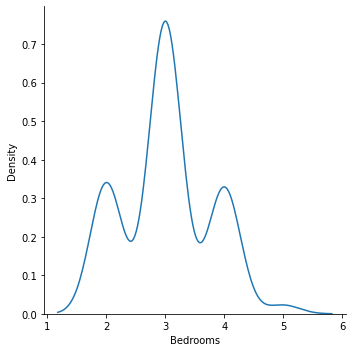

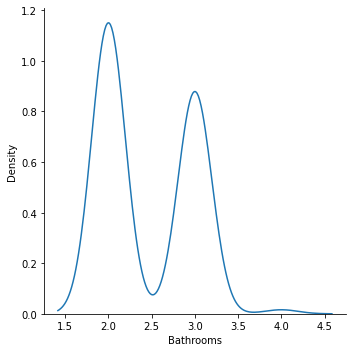

In [29]:
sns.displot(df, x="Price", kind="kde")
sns.displot(df, x="SqFt", kind="kde")
sns.displot(df, x="Bedrooms", kind="kde")
sns.displot(df, x="Bathrooms", kind="kde")


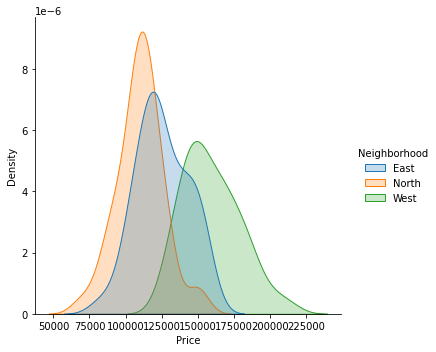

In [31]:
sns.displot(df, x="Price",hue="Neighborhood", kind="kde", fill=True)

#Output shows that House is costlier on West side, and cheapest on the North side

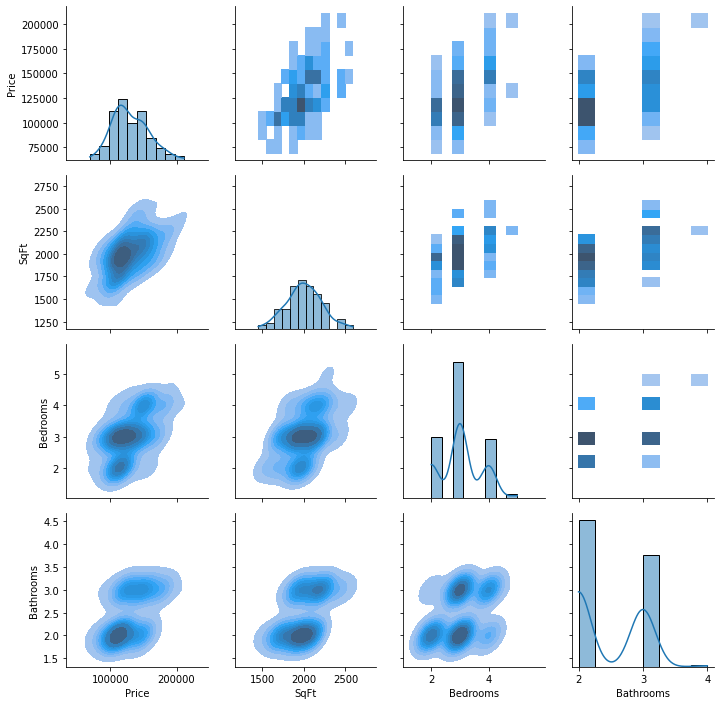

In [32]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

# Model


In [43]:
array = df.values
X = array[:,1:4]
Y = array[:,0]
Y=Y.astype('int')
#print(X,Y)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)


In [58]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [59]:
clf.predict(X_validation)

array([103200, 103200, 117800, 117800, 133600, 103200, 117800, 117800,
       117800, 117800, 103200, 103200, 117800, 133600, 117800, 117800,
       117400, 103200, 117800, 117800, 117800, 103200, 117800, 133600,
       117800, 103200])

In [60]:
clf.predict_proba(X_validation)

array([[0.0080659 , 0.00832245, 0.0129849 , ..., 0.01245463, 0.01232566,
        0.01247274],
       [0.00789834, 0.00873084, 0.00859017, ..., 0.00966185, 0.00874323,
        0.01067804],
       [0.01012777, 0.00658584, 0.00933717, ..., 0.00655537, 0.00563675,
        0.00767104],
       ...,
       [0.00341136, 0.00989186, 0.01168179, ..., 0.02522733, 0.03068131,
        0.02010094],
       [0.01012267, 0.00665042, 0.00940769, ..., 0.00665176, 0.0057404 ,
        0.00775326],
       [0.00806031, 0.00812379, 0.00815524, ..., 0.00860708, 0.00753881,
        0.00985521]])

In [62]:
clf.score(X_train,Y_train)

0.0392156862745098

In [69]:
clf.predict([[2130,3,3]])

array([117800])